In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def categ_bar_pourcent2(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order ,palette='pastel' )
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 


def categ_perc(df_ ,y_ , fig_x , fig_y) :
    plt.figure(figsize=(fig_x , fig_y))
    order = df[y_].value_counts().index
    ax = sns.countplot(data=df_, y=y_, palette='pastel' , order=order)

    total = len(df_)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 10
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), fontsize=12)

    plt.xlabel('Count', fontsize=14)
    plt.ylabel(y_, fontsize=14)
    plt.title(f'Count of {y_} with Percentage', fontsize=16)

    plt.show()



Data Dictionary : 

- transdatetrans_time : Transaction DateTime
- merchant : Merchant Name
- cc_num : credit card number
- category : Category of Merchant
- amt : Amount of Transaction
- city : City of Credit Card Holder
- state : State of Credit Card Holder
- lat : Latitude Location of Purchase
- long : Longitude Location of Purchase
- city_pop : Credit Card Holder's City Population
- job : Job of Credit Card Holder
- dob : Date of Birth of Credit Card Holder
- trans_num : Transaction Number
- merch_lat : Latitude Location of Merchant
- merch_long : Longitude Location of Merchant
- is_fraud : Whether Transaction is Fraud (1) or Not (0)

In [2]:
df = pd.read_csv('../../data/fraudTrain.csv')
df.drop(columns=['Unnamed: 0'] , inplace=True)
df.head()    

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.shape 

(1296675, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [5]:
df['cc_num'] = df['cc_num'].astype('str') 
df['unix_time'] = df['unix_time'].astype('str') 
df['zip'] = df['zip'].astype('str') 


In [6]:
pd.set_option('display.max_columns', None)

df.describe(include='all'  )

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,1296675,1296675,1296675,1296675,1.296675e+06,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06
unique,1274791,983,693,14,NaN,352,481,2,983,894,51,970,NaN,NaN,NaN,494,968,1296675,1274823,NaN,NaN,NaN
top,2019-04-22 16:02:01,571365235126,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,73754,NaN,NaN,NaN,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,1370177227,NaN,NaN,NaN
freq,4,3123,4403,131659,NaN,26669,28794,709863,3123,5617,94876,3646,NaN,NaN,NaN,9779,5636,1,4,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,7.035104e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.853762e+01,-9.022634e+01,8.882444e+04,NaN,NaN,NaN,NaN,3.853734e+01,-9.022646e+01,5.788652e-03
std,NaN,NaN,NaN,NaN,1.603160e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,NaN,NaN,5.109788e+00,1.377109e+01,7.586269e-02
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.002710e+01,-1.656723e+02,2.300000e+01,NaN,NaN,NaN,NaN,1.902779e+01,-1.666712e+02,0.000000e+00
25%,NaN,NaN,NaN,NaN,9.650000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.462050e+01,-9.679800e+01,7.430000e+02,NaN,NaN,NaN,NaN,3.473357e+01,-9.689728e+01,0.000000e+00
50%,NaN,NaN,NaN,NaN,4.752000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.935430e+01,-8.747690e+01,2.456000e+03,NaN,NaN,NaN,NaN,3.936568e+01,-8.743839e+01,0.000000e+00
75%,NaN,NaN,NaN,NaN,8.314000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.194040e+01,-8.015800e+01,2.032800e+04,NaN,NaN,NaN,NaN,4.195716e+01,-8.023680e+01,0.000000e+00


The data covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. so i think we can use the cc_num as an ID to the data , zip code is unique for these customers 

In [7]:
df.drop(columns=['trans_num' ,'unix_time' ] , inplace=True)  

Dropping useless columns 

In [8]:
duplicate_counts = df.groupby(['cc_num','first', 'last']).size().reset_index(name='count')

# Filter and print only the rows where the count is greater than 1
redundant_rows = duplicate_counts[duplicate_counts['count'] > 1]

if not redundant_rows.empty:
    print("Redundant rows:")
    print(redundant_rows)
else:
    print("No redundant rows found.")

Redundant rows:
              cc_num       first      last  count
0    180011453250192       Craig      Dunn   2065
1    180014262259255     Brianna      Page   1019
2    180017442990269    Michelle  Anderson   1045
3    180018375329178    Michelle     Woods   1521
4    180031190491743       Becky  Mckinney   2539
..               ...         ...       ...    ...
978     676314217768       Ellen  Carrillo    522
979     676326610042  Jacqueline  Caldwell    504
980     676327197445    Benjamin      Beck      8
981     676369110710       David     Wolfe   2049
982     676372984911       Vicki   Mendoza   2574

[983 rows x 4 columns]


In [9]:
redundant_rows[ redundant_rows['first']=='Adam'  ]

,cc_num,first,last,count
39,213125815021702,Adam,Kirk,1556
47,213156747557083,Adam,Santos,2603
348,3566875419572867,Adam,Mcdonald,1022
549,4223708906367574214,Adam,Riddle,2082
776,4917226033950,Adam,Keller,521
867,6011366578560244,Adam,Stark,2060


In [10]:
duplicate_counts = df.groupby(['first', 'last']).size().reset_index(name='count')

# Filter and print only the rows where the count is greater than 1
redundant_rows = duplicate_counts[duplicate_counts['count'] > 1]

if not redundant_rows.empty:
    print("Redundant rows:")
    print(redundant_rows)
else:
    print("No redundant rows found.")

Redundant rows:
       first      last  count
0      Aaron    Murray   2050
1      Aaron      Pena   1476
2      Aaron    Rogers    508
3      Aaron   Stewart    537
4       Adam    Keller    521
..       ...       ...    ...
968  William  Thompson   2052
969   Willie    Jordan   1038
970   Xavier   Beltran   1516
971  Zachary     Allen   1523
972  Zachary     Boone    495

[973 rows x 3 columns]


Ok then we shall remove the first and last name of the user because we have his cc number already ((ID sort of say ))

In [11]:
df.drop(columns=['first' ,'last' ] , inplace=True) 

Extracting age feature out of date of birth and removing unwanted column

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])


In [13]:
df['age'] = (df['trans_date_trans_time'] - df['dob']).apply(lambda x: x.days // 365) 

In [14]:
df.drop(columns=['dob'] , inplace=True)

In [15]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance


# Calculate distance and insert it into a new column
df['distance_km'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])



df.drop(columns=['lat' , 'long' , 'merch_lat' , 'merch_long'] , inplace = True)



we can conclude the distance between the person and the merchant 

we shall drop the lat and long features because they are not needed for the analysis 

<Figure size 1440x360 with 0 Axes>

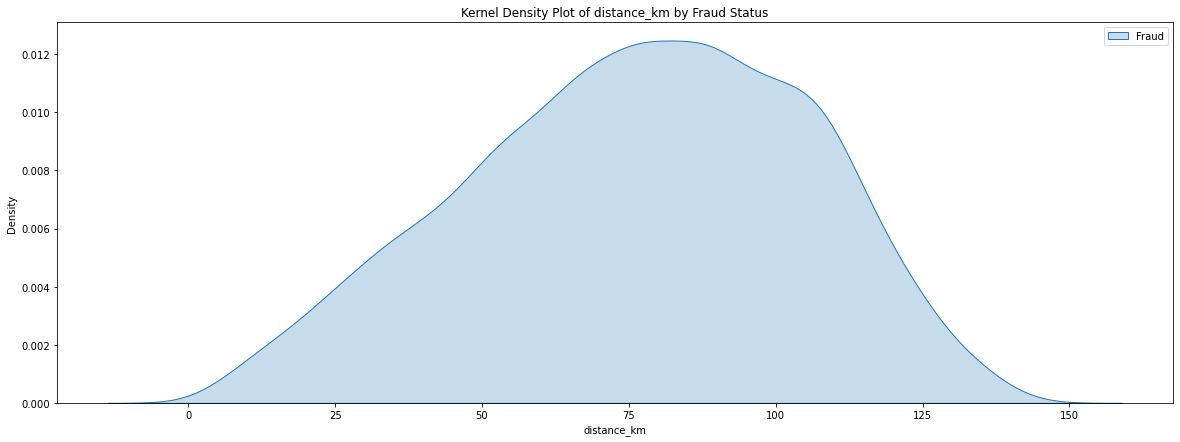

In [16]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,5) )
plt.figure(figsize=(20, 7))
#sns.kdeplot(df[df['is_fraud'] == 0]['distance_km'], fill=True, label='Non-Fraud')
sns.kdeplot(df[df['is_fraud'] == 1]['distance_km'], fill=True, label='Fraud')
plt.title('Kernel Density Plot of distance_km by Fraud Status')
plt.xlabel('distance_km')
plt.ylabel('Density')
plt.legend()
plt.show()   


# time difference / frequency  / age 

seems like the distance wasn't a big factor in deciding wether the transaction is fraud or not 

#### Category 

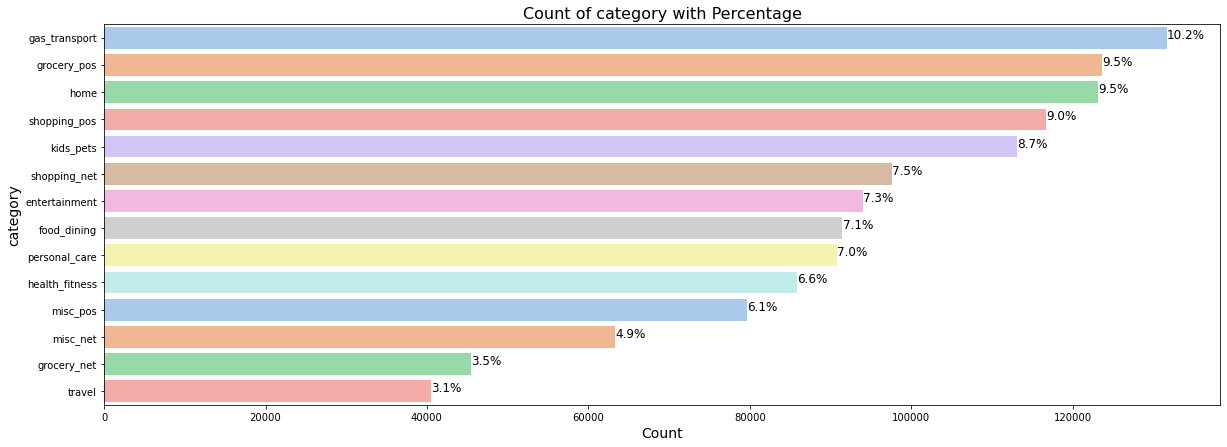

In [17]:
categ_perc(df,'category' , 20 , 7)  


Text(0.5, 1.0, 'Distribution of fraud by category ')

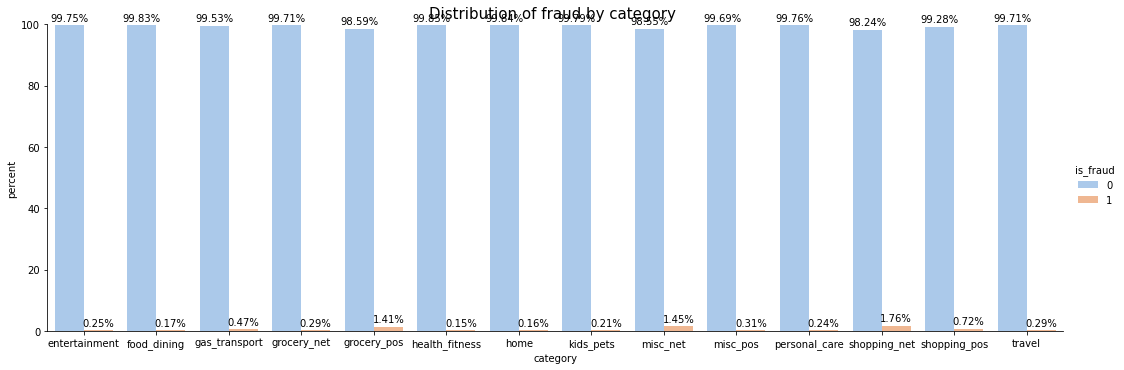

In [18]:
categ_bar_pourcent2(df,'category','is_fraud',3 )   
plt.title("Distribution of fraud by category ", fontsize=15)


#### CC_num

These are the credit card numbers with the highest average transaction amounts 

<AxesSubplot:title={'center':'Average amt Charges per cc_num - Top 15 '}, ylabel='cc_num'>

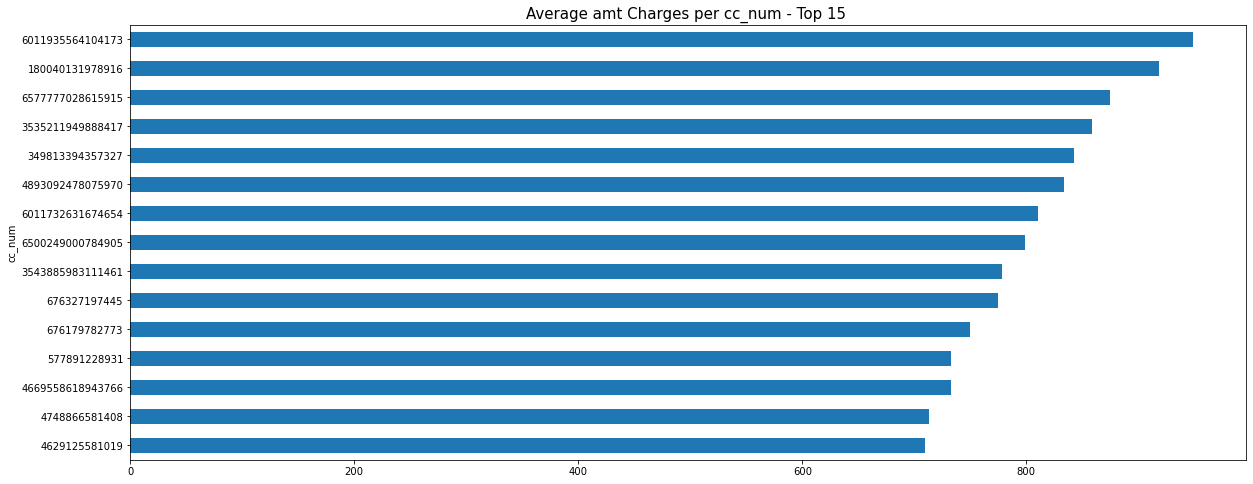

In [19]:
plt.figure(figsize = (20,8))    
plt.title("Average amt Charges per cc_num - Top 15 ", fontsize=15)
df.groupby('cc_num')['amt'].mean().sort_values(ascending=False).head(15)[::-1].plot(kind='barh') 


In [20]:
ids_list =  df.groupby('cc_num')['amt'].mean().sort_values(ascending=False).head(15).index.to_list()


In [21]:
df[df['cc_num'].isin(ids_list) ]['is_fraud'].value_counts()           

1    143
Name: is_fraud, dtype: int64

apparently all of these cards appear to have done fraud transaction , maybe the bigger the amount the higher the chance of being a fraud transaction 

In this chart you will see where these credit cards where spotted and exactly in which cities with their counts too 

In [22]:
from ipywidgets import interact, Dropdown 
filtered_df = df[df['cc_num'].isin(ids_list)]


# Create an interactive dropdown to select a state
@interact(state=Dropdown(options=filtered_df['state'].unique()))
def create_count_plot(state):
    state_df = filtered_df[filtered_df['state'] == state]
    
    plt.figure(figsize=(20, 7))
    sns.countplot(data=state_df, y='city', palette='pastel')
    plt.title(f'Count Plot of Cities in {state}')
    plt.xlabel('City')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout() 
    plt.show() 

interactive(children=(Dropdown(description='state', options=('OR', 'NY', 'IN', 'MO', 'PA', 'TX', 'TN', 'NC', '…

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

#### Age distribution 

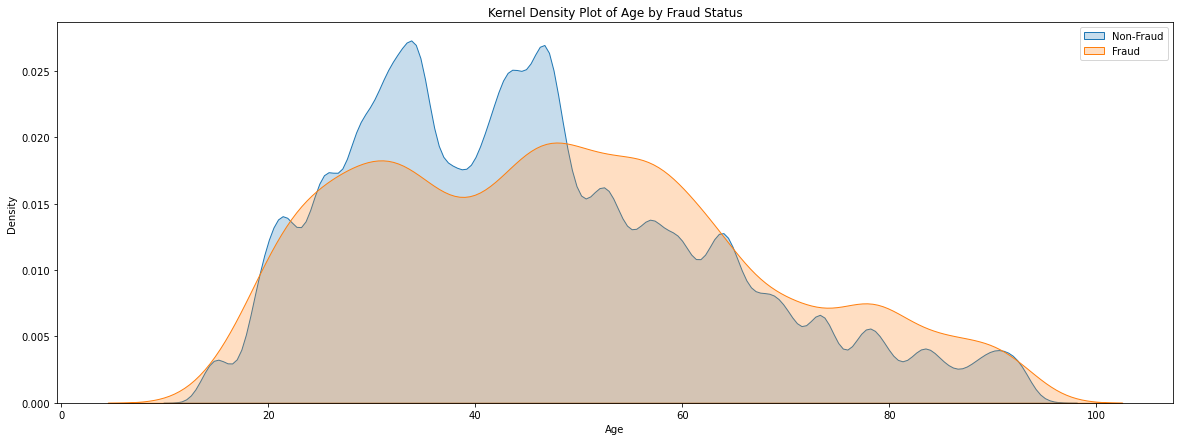

In [23]:
plt.figure(figsize=(20, 7))
sns.kdeplot(df[df['is_fraud'] == 0]['age'], fill=True, label='Non-Fraud')
sns.kdeplot(df[df['is_fraud'] == 1]['age'], fill=True, label='Fraud')
plt.title('Kernel Density Plot of Age by Fraud Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()   


#### Jobs

<AxesSubplot:title={'center':'Count Plot for jobs with the Most Fraud'}>

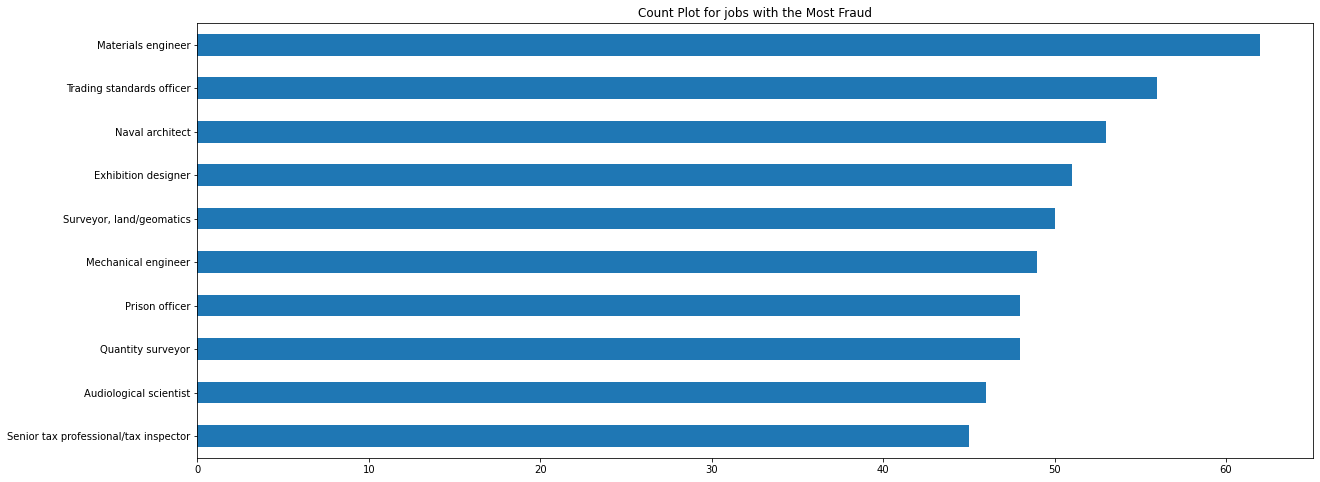

In [24]:
plt.figure(figsize = (20,8))    
plt.title(f'Count Plot for jobs with the Most Fraud')

df[df['is_fraud'] == 1]['job'].value_counts().head(10)[::-1].plot(kind='barh') 



Materials engineers appear to have a higher chance to being in fraud transactions 

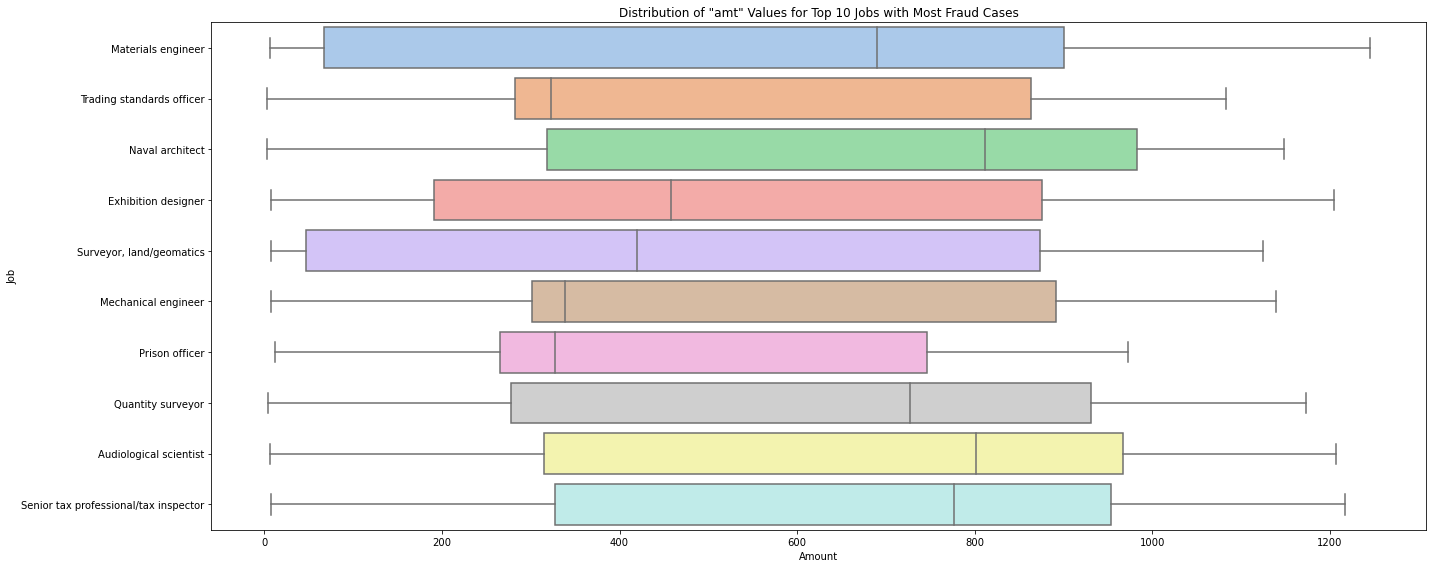

In [25]:

desired_order =  df[df['is_fraud'] == 1]['job'].value_counts().head(10).index.to_list()
fraud_df = df[df['is_fraud'] == 1]

# Count the occurrences of each job and select the top 10 jobs
top_jobs = fraud_df['job'].value_counts().head(10).index.tolist()

# Reorder the top_jobs list based on the desired order
reordered_top_jobs = [job for job in desired_order if job in top_jobs]

# Filter the DataFrame to include only the top 10 jobs in the desired order
top_jobs_df = fraud_df[fraud_df['job'].isin(reordered_top_jobs)]

# Create the violin plot
plt.figure(figsize=(20, 8))
sns.boxplot(data=top_jobs_df, x='amt', y='job', palette='pastel', order=reordered_top_jobs)
plt.title('Distribution of "amt" Values for Top 10 Jobs with Most Fraud Cases')
plt.xlabel('Amount')
plt.ylabel('Job')
plt.tight_layout()
plt.show()

Distribution of transaction amounts per job 

#### State & City 

<AxesSubplot:title={'center':'Count Plot for states with the Most Fraud'}>

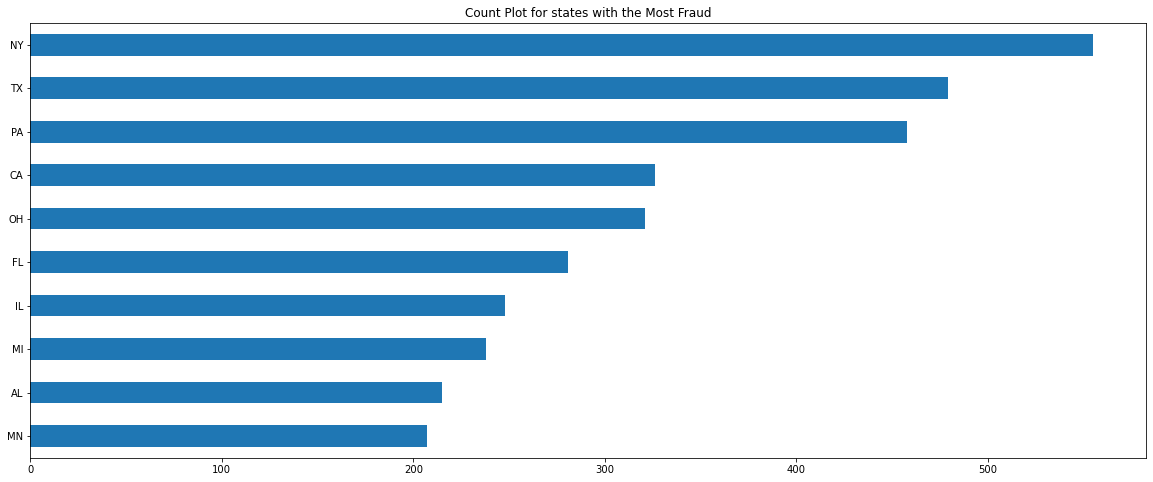

In [26]:
plt.figure(figsize = (20,8))     
plt.title(f'Count Plot for states with the Most Fraud')
df[df['is_fraud'] == 1]['state'].value_counts().head(10)[::-1].plot(kind='barh') 


In the below chart you will see which cities in these states have the most fraud cases and you can zoom even more to see which streets have the highest rates of fraud cases too 

In [27]:
top_fraud_states = df[df['is_fraud'] == 1]['state'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top fraud states
filtered_df = df[(df['state'].isin(top_fraud_states)) & (df['is_fraud'] == 1)]

# Create an interactive dropdown to select a state
@interact(state=Dropdown(options=filtered_df['state'].unique()))
def create_count_plot(state):
    state_df = filtered_df[filtered_df['state'] == state]
    
    city_counts = state_df['city'].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(20, 10))
    sns.barplot(x=city_counts, y=city_counts.index, palette='pastel')
    plt.title(f'Count Plot of Cities in {state} with the Most Fraud')
    plt.xlabel('Count')
    plt.ylabel('City')
    plt.tight_layout()
    plt.show()

@interact(state=Dropdown(options=filtered_df['state'].unique()))
def create_count_plot(state):
    state_df = filtered_df[filtered_df['state'] == state]
    
    city_counts = state_df['street'].value_counts().sort_values(ascending=False)
    
    plt.figure(figsize=(20, 10))
    sns.barplot(x=city_counts, y=city_counts.index, palette='pastel')
    plt.title(f'Count Plot of Streets in {state} with the Most Fraud')
    plt.xlabel('Count')
    plt.ylabel('Street')
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='state', options=('TX', 'PA', 'OH', 'NY', 'FL', 'AL', 'CA', 'MI', '…

interactive(children=(Dropdown(description='state', options=('TX', 'PA', 'OH', 'NY', 'FL', 'AL', 'CA', 'MI', '…

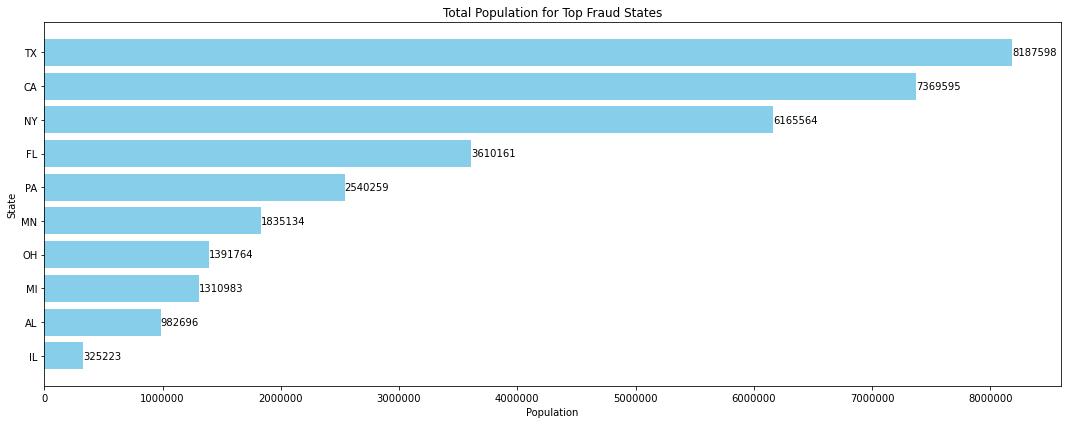

In [28]:
import matplotlib.ticker as ticker  

df_non_dup = df.drop_duplicates(subset=['city']) 
state_population = df_non_dup.groupby('state')['city_pop'].sum().reset_index()
top_states_population = state_population[state_population['state'].isin(top_fraud_states)]
top_states_population = top_states_population.sort_values(by='city_pop', ascending=True)

plt.figure(figsize=(15, 6))
bars = plt.barh(top_states_population['state'], top_states_population['city_pop'], color='skyblue'  )
plt.xlabel('Population')
plt.ylabel('State')
plt.title('Total Population for Top Fraud States')

def format_ticks(x, pos):
    return f'{x:.0f}'

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center')

plt.tight_layout()
plt.show()

For these top states here is the average transaction amounts 

<AxesSubplot:title={'center':'Average amt  per state for Top 10 states with most fraud'}, ylabel='state'>

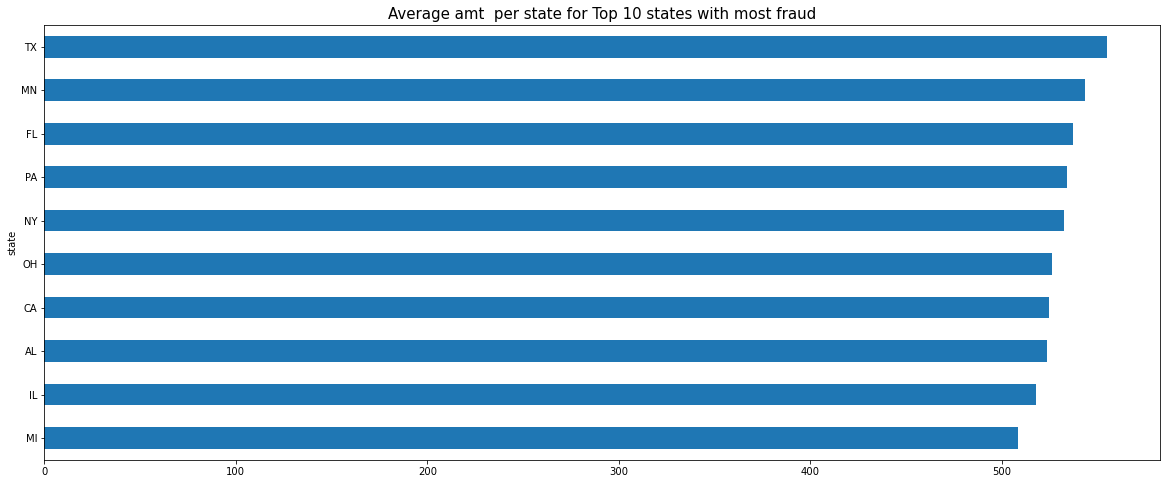

In [34]:
filtered_df = df[(df['state'].isin(top_fraud_states)) & (df['is_fraud'] == 1)]
plt.figure(figsize = (20,8))     
plt.title("Average amt  per state for Top 10 states with most fraud", fontsize=15)
filtered_df.groupby('state')['amt'].mean().sort_values(ascending=False).head(15)[::-1].plot(kind='barh') 


#### Dates

In [30]:
df['hour'] = pd.DatetimeIndex(df['trans_date_trans_time']).strftime('%I %p')
df['day'] = pd.DatetimeIndex(df['trans_date_trans_time']).strftime('%A') 
df['month'] = pd.DatetimeIndex(df['trans_date_trans_time']).strftime('%B') 
df['year'] = df['trans_date_trans_time'].dt.year  

In [31]:
df.drop(columns=['trans_date_trans_time'] , inplace = True)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown


@interact(variable=Dropdown(options=['hour', 'day', 'month', 'year']))
def create_dynamic_histogram(variable):
    plt.figure(figsize=(20, 10))
    ax = sns.histplot(data=df, x=variable, hue='is_fraud', common_norm=False, stat='percent', multiple='dodge')
    ax.set_ylabel('Percentage')
    
    if variable == 'hour':
        ax.set_xlabel('Time (Hour) in a Day')
        plt.xticks(np.arange(0, 24, 1))
    elif variable == 'day':
        ax.set_xlabel('Day in a Month')
    elif variable == 'month':
        ax.set_xlabel('Month')
    elif variable == 'year':
        ax.set_xlabel('Year')
    
    plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])
    plt.tight_layout()
    plt.show()

# Replace the sample DataFrame creation with your actual data and column names


interactive(children=(Dropdown(description='variable', options=('hour', 'day', 'month', 'year'), value='hour')…